# Laboratorio 5 - Inteligencia Artificial
Autores: Stefano Aragoni, Carol Arévalo, Luis Santos

### Task 1.0: Exploración y Limpieza de Datos
Como primer paso, se importa el archivo a través de distintas librerías. 

In [1]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Cargar el dataset
data = pd.read_csv('dataset_phishing.csv')

# Imprimir las primeras 5 filas
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


##### Datos Faltantes
En este caso, primero se analizó si hacían falta datos en el dataset. En este caso, todos los datos estaban almacenados y no habían datos fuera de lugar. 

Index([], dtype='object')

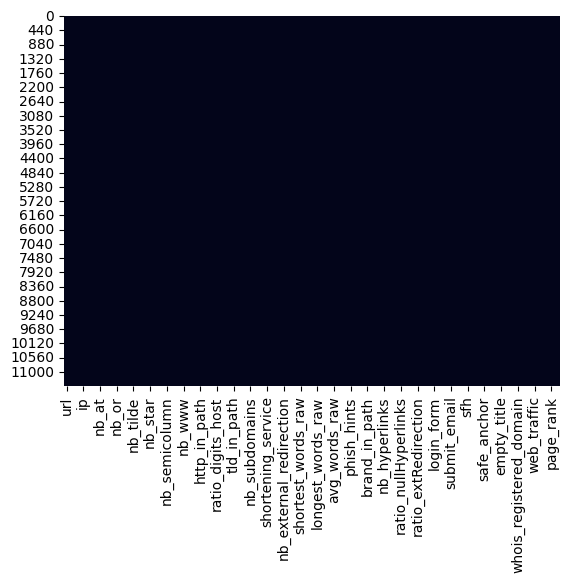

In [2]:
# Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
data.columns[data.isnull().any()]

##### Encoding
En este caso, se necesita convertir a la columna Status a una variable númerica. Esta columna almacena "legitimate" o "phishing" dependiendo de cuál haya sido el resultado; se debe hacer un procedimiento de encoding. 0 representará legitimate y 1 phishing.

In [3]:
data = pd.read_csv('dataset_phishing.csv')

# Imprimir columas que no sean numéricas
print('Columnas categóricas:\n',data.select_dtypes(exclude=[np.number]).dtypes)

# Convertir Status a numérico
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})

# Eliminar la columa de URL
data = data.drop('url', axis=1)

# Imprimir las primeras 5 filas
print('\n\nDatos convertidos:')
data.head()

Columnas categóricas:
 url       object
status    object
dtype: object


Datos convertidos:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


##### Balanceo
En este caso, primero se determinó la proporción de datos correspondiente. Ya que se contaba con una cantidad igual de muestras para phishing y legitimate, no hubo necesidad de hacer balanceo.

In [4]:
# Calcular cuantas columnas son phishing y cuantas no
print('Número de phishing:',data[data['status'] == 1].shape[0])
print('Número de legitimate:',data[data['status'] == 0].shape[0])

Número de phishing: 5715
Número de legitimate: 5715


##### Escalar
En este caso, se utilizó la librería de SKLearn para poder escalar y normalizar los datos que lo necesitaran. Asimismo, también se hizo un análisis pre y post escalamiento para determinar la distribución de los datos. En el preprocesamiento, se podía observar cómo ciertas variables tenían una alta desviación estándar a comparación de su respectiva media. Esto fue solucionado a través de la función de StandardScaler(). 

>Asimismo, es importante mencionar que la normalización de datos es importante cuando se está utilizando modelos KNN o SVM. 

In [5]:
# Calcular media y desviación estándar de cada columna
print('\n\nMedia y desviación estándar de cada columna:')
data.describe()



Media y desviación estándar de cada columna:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [6]:
# Libreía para escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('status',axis=1))

# Escalar los datos
scaled_features = scaler.transform(data.drop('status',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])

# Agregar la columna de status
df_feat['status'] = data['status']

df_feat.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,...,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,1
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217,0
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,...,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355,0


Finalmente, se quiso determinar la correlacion entre las variables con status para poder graficar dos variables y los grupos posteriormente. En este caso, "page_rank", "nb_www", "nb_hyperlinks", y "domain_age" presentaron los índices de correlación más alta. Por tal razón, se utilizarán estas variables y otras con correlación mayor a abs(0.2) para el respectivo análisis. 

In [7]:
# Correlación entre las columnas y el status
df_feat.corr()['status'].sort_values()

page_rank              -0.511137
nb_www                 -0.443468
nb_hyperlinks          -0.342628
domain_age             -0.331889
ratio_intHyperlinks    -0.243982
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64

In [8]:
# Eliminar las columnas con correlación menor a abs(0.2)

variables = df_feat.corr()['status'].sort_values().index
variables = variables[abs(df_feat.corr()['status'].sort_values()) > 0.3]

# Se eliminaron las siguientes columnas a pesar de tener una correlación mayor a 0.3 ya que se le dio prioridad a las variables no-binarias
variables = variables.drop('ip')
variables = variables.drop('nb_www')
variables = variables.drop('nb_hyperlinks')

# Imprimir las columnas que se van a usar
print('Columnas a usar:\n',variables)

# Eliminar las columnas que no se van a usar
df_feat = df_feat[variables]

Columnas a usar:
 Index(['page_rank', 'domain_age', 'phish_hints', 'domain_in_title',
       'ratio_digits_url', 'google_index', 'status'],
      dtype='object')


----------
### Task 1.1: K-Nearest Neighbors

#### Task 1.1.1: KNN Manual
En este caso, se creó un algoritmo de KNN con las siguientes consideraciones.
1. La distancia entre puntos debe ser la dada por la forma de la distancia Euclidiana
2. Utilice el dataset proporcionado para mostrar el funcionamiento de su algoritmo
3. Provea una métrica de desempeño, justificando su elección
4. Grafique los grupos encontrados (Puede usar solamente dos variables para mostrarlos en un plano cartesiano)
5. Mencione, como comentario las consideraciones extras que tuvo que tomar en cuenta durante la realización de su implementación

Referencia de algoritmo KNN: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

In [9]:
# FUNCIONES

# Distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

# Clase más común dentro de los vecinos
def most_frequent(vecinos): 
    return max(set(vecinos), key = vecinos.count)

# Predicción
def predict(X_train, X_test, y_train, k):
    vecinos = []

    for x in X_test:
        distancia = euclidean_distance(x, X_train)
        # Ordenar los vecinos por distancia
        vecinos_ordenados = [y_train[i] for i in sorted(range(len(distancia)), key=lambda j: distancia[j])]
        vecinos_ordenados = vecinos_ordenados[:k]
        # Almacenar K top vecinos
        vecinos.append(vecinos_ordenados)

    # Obtener la clase más común
    resultado = []
    for vecino in vecinos:
        resultado.append(most_frequent(vecino))
    return resultado

# Evaluar modelo a través de accuracy
def evaluate(y_test, y_pred):
    count_aciertos = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            count_aciertos += 1

    return count_aciertos / len(y_test)

In [10]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_feat.drop('status',axis=1), df_feat['status'], test_size=0.20)

# Cantidad de vecinos a considerar = raíz cuadrada de la cantidad de datos de prueba
neighbors = len(X_test)**0.5
neighbors = int(neighbors)
# Numero impar de neighbors
if neighbors % 2 == 0:
    neighbors += 1

# Calcular la precisión
y_pred = predict(X_train.values, X_test.values, y_train.values, neighbors)
print('Accuracy:',evaluate(y_test.values, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test.values, y_pred)
print('Matriz de confusión:\n',cm)

Accuracy: 0.9011373578302713
Matriz de confusión:
 [[1038  125]
 [ 101 1022]]


> Métricas de Desempeño

En el presente análisis fue posible utilizar la métrica de desempeño pues se balancearon los datos, de lo contrario no sería considerada una métrica válida. 

Para medir el desempeño del modelo creado, se utilizó una matríz de confusión y la calificación de exactitud del modelo. Cada uno de estos dos valores son importantes para evaluar el modelo, ya que permite analizar diferentes aspectos de este. 
La calificación de exactitud es un valor único que califica que tanto se parecen los valores calculados por el modelo con los valores esperados. En otras palabras, es el porcentaje de predicciones que el modelo obtuvo correctos. Para el modelo creado se obtuvo una calificación de exactitud del 91%, lo cual indica que el modelo coincide en su mayoría con los datos esperados. 

Ademas de la calificación de exactitud, se utiliza una matríz de confusión para analizar los valores correctos, los falsos positivos, y los falsos negativos. En esta matriz, se observan cuatro valores almacenados en una matríz de dos por dos. En la primera fila, se muestran la cantidad de verdaderos positivos y falsos positivos. En la segunda fila, se muetran la cantidad de falsos positivos y verdaderos negativos. Esta matríz es importante porque resume los resultados de una predicción en un problema de clasificación. Adicionalmente, permite calcular otras métricas de desempeño como la calificación de exactitud. 

> CONSIDERACIONES EXTRAS:

Al analizar los datos, fue importante considerar que variables aportaban información relevante al modelo y cuales unicamente generaban ruido. Las variables que generan ruido son aquellas que tienen una correlación baja a los resultados obtenidos, por lo cual no se pueden utilizar para predecir futuros resultados. Una vez identificadas las variables irrelevantes para el modelo creado, estas fueron eliminandas del dataset para evitar que se generara ruido. Si por alguna razón no se eliminaran estas variables, se podría dar una disminución en la calificación de exactitud del modelo. 

Adicionalmente, es importante normalizar los datos antes de crear el modelo. Esto asegura que los datos que se estan utilizando tengan todos el mismo formato. La normalización de datos también asegura que no haya datos faltantes, ya que estos son añadidos con diferentes estrategias dependiendo de lo que se necesita. Es importante normalizar los datos para asegurar que el modelo funcione correctamente, ya que de otra manera se podrían leer de manera errónea los datos. 

Posteriormente, se graficaron los grupos generados por el KNN (algoritmo sin librerias). 

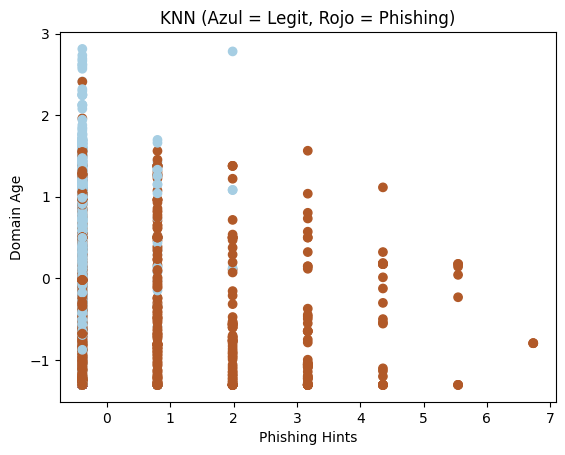

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=y_pred, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('KNN (Azul = Legit, Rojo = Phishing)')
plt.show()

#### Task 1.1.2: KNN con SKLearn
En este caso, se repitió el mismo procedimiento pero esta vez se utilizó la librería de SKLearn para realizar el respectivo modelo. En este caso, ambos presentaros resultados iguales... sin embargo, SKLearn es capaz de hacer los cálculos de manera más rápida. 

In [12]:
# KNN con sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

# Calcular accuracy
print('Accuracy:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('Matriz de confusión:\n', confusion_matrix(y_test, predictions))



Accuracy: 0.9256342957130359
Matriz de confusión:
 [[1078   85]
 [  85 1038]]


Finalmente, se graficaron los grupos generados por el KNN de SKLearn. 

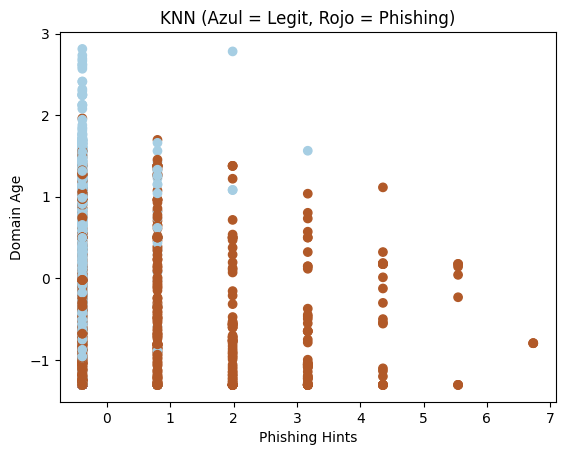

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('KNN (Azul = Legit, Rojo = Phishing)')
plt.show()

> Comparación de Resultados

Al comparar los datos del modelo creado con la librería y los datos del modelo creado sin la librería, se puede observar que el modelo que utilizó una libreria es un poco más exacto. Esto se hace evidente al comparar las calificaciones de exactitud, que son de 0.93 y 0.91 para el modelo que utiliza y no utiliza una librería respectivamente. Adicionalmente, al comparar las matrices de confusión, se puede observar que el modelo que utiliza una librería presenta menos falsos negativos al igual que menos falsos positivos. Estas dos métricas de desempeño permiten afirmar que el modelo creado con una librería fue una mejor implementación.

---------
### Task 1.2: Support Vector Machines
A continuación se creó un modelo SVM con SKLearn en base a las siguientes consideraciones:
1. Divida el dataset en 80% para entrenamiento, 10% para validación (tuning) y 10% para test
2. Provea una métrica de desempeño, justificando su elección
3. Grafique los grupos encontrados (Puede usar solamente dos variables para mostrarlos en un plano cartesiano)
5. Mencione, como comentario que variables tuvieron que hacer tunning y cualquier otra consideración extra que tuvieron que tomar en cuenta

Como primer paso, se divió el dataset en las proporciones anteriormente indicadas. Cabe destacar que la variable de status se cambió de 0 a -1 y 1 a 1 para así cumplir con el requisito de SVM.

In [14]:
# Cambiar la columna de status a -1 y 1
df_svm = df_feat.copy()
df_svm['status'] = df_feat['status'].map({0: -1, 1: 1})

# Dividir los datos en entrenamiento (80%) y test (20%)
X_train, X_test_val, y_train, y_test_val = train_test_split(df_svm.drop('status',axis=1), df_svm['status'], test_size=0.20)

# Dividir los datos de entrenamiento y validación (80%) en entrenamiento (80%) y validación (20%)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# Comprobar tamaño de los datos
print('Tamaño de los datos de entrenamiento:',X_train.shape)
print('Tamaño de los datos de validación:',X_val.shape)
print('Tamaño de los datos de test:',X_test.shape)

Tamaño de los datos de entrenamiento: (9144, 6)
Tamaño de los datos de validación: (1143, 6)
Tamaño de los datos de test: (1143, 6)


Posteriormente, se creó el algoritmo de SVM manualmente para poder generar el modelo. A continuación se presenta una clase de SVM que hace los respectivos cálculos.

In [15]:
import numpy as np

# SMO - Ref: https://chubakbidpaa.com/svm/2020/12/27/smo-algorithm-simplifed-copy.html
import numpy as np

class SVM:

    def __init__(self, X, y, kernel_type='linear', gamma=None, C=1.0):
        self.X = X
        self.y = y

        # Hiperparámetros
        self.kernel_type = kernel_type
        self.gamma = gamma
        self.C = C
        self.epsilon = 0.1

        # Inicializar alphas y b
        self.alpha = np.zeros(len(X))
        self.b = 0.0

    # funciones del kernel
    def kernel(self, x1, x2):
        if self.kernel_type == 'linear':
            # lineal
            return np.dot(x1, np.transpose(x2))
        elif self.kernel_type == 'rbf':
            # rbf
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        elif self.kernel_type == 'poly':
            # polinomial
            return (self.gamma * np.dot(x1, np.transpose(x2))) ** 3    #SKLearn utiliza grado 3, por defecto. Se copia el comportamiento.

    def fit(self):
        # Inicializar kernel matrix
        n_samples = len(self.X)
        kernel_matrix = np.zeros((n_samples, n_samples))

        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(self.X[i], self.X[j])

        # SMO: https://www.youtube.com/watch?v=ZwGaLJbKHiQ
        alpha_prev = np.copy(self.alpha)
        iterations = 0
        while True:
            num_changed_alphas = 0
            for i in range(n_samples):
                error_i = np.sum(self.alpha * self.y * kernel_matrix[:, i]) + self.b - self.y[i]
                if (self.y[i] * error_i < -self.epsilon and self.alpha[i] < self.C) or \
                   (self.y[i] * error_i > self.epsilon and self.alpha[i] > 0):
                    j = np.random.choice([j for j in range(n_samples) if j != i])
                    error_j = np.sum(self.alpha * self.y * kernel_matrix[:, j]) + self.b - self.y[j]

                    alpha_i_prev = self.alpha[i]
                    alpha_j_prev = self.alpha[j]

                    if self.y[i] != self.y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    eta = 2 * kernel_matrix[i, j] - kernel_matrix[i, i] - kernel_matrix[j, j]
                    if eta >= 0:
                        continue

                    self.alpha[j] -= (self.y[j] * (error_i - error_j)) / eta
                    self.alpha[j] = max(self.alpha[j], L)
                    self.alpha[j] = min(self.alpha[j], H)

                    if abs(self.alpha[j] - alpha_j_prev) < self.epsilon:
                        self.alpha[j] = alpha_j_prev
                        continue

                    self.alpha[i] += self.y[i] * self.y[j] * (alpha_j_prev - self.alpha[j])

                    b1 = self.b - error_i - self.y[i] * (self.alpha[i] - alpha_i_prev) * kernel_matrix[i, i] \
                         - self.y[j] * (self.alpha[j] - alpha_j_prev) * kernel_matrix[i, j]

                    b2 = self.b - error_j - self.y[i] * (self.alpha[i] - alpha_i_prev) * kernel_matrix[i, j] \
                            - self.y[j] * (self.alpha[j] - alpha_j_prev) * kernel_matrix[j, j]
                    
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    num_changed_alphas += 1

            if np.linalg.norm(self.alpha - alpha_prev) < self.epsilon:
                break

            alpha_prev = np.copy(self.alpha)
            iterations += 1

    # Predicción
    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(np.sign(np.sum(self.alpha * self.y * np.array([self.kernel(x, x_) for x_ in self.X])) + self.b))
        return np.array(y_pred)
    
#x_svm = np.array(X_val)
#y_svm = np.array(y_val)

#svm = SVM(x_svm, y_svm, 'rbf', 0.1, 1)
#svm.fit()
#predictions = svm.predict(np.array(X_test))

#print('Accuracy: ', accuracy_score(y_test, predictions))

Con eso hecho, se implementó un Grid Search y un Cross Validation para poder determinar los mejores valores para el mismo algoritmo. A continuación se presenta esta sección del código.

In [16]:
import numpy as np

def svm_cross_validation(x_train, y_train, c, gamma, kernel, cv):

    n_samples = len(y_train)
    fold_size = n_samples // cv
    accuracy_scores = []

    for i in range(cv):
        # Separar los datos en conjuntos de entrenamiento y validación en cada iteración
        start = i * fold_size
        end = (i + 1) * fold_size
        x_val_fold = x_train[start:end]
        y_val_fold = y_train[start:end]
        x_train_fold = np.concatenate([x_train[:start], x_train[end:]])
        y_train_fold = np.concatenate([y_train[:start], y_train[end:]])

        x_train_fold = np.array(x_train_fold)
        y_train_fold = np.array(y_train_fold)

        # Entrenar el modelo con los datos de entrenamiento
        svm = SVM(x_train_fold, y_train_fold, kernel, gamma, c)
        svm.fit()

        # Evaluar el modelo con los datos de validación
        predictions = svm.predict(np.array(x_val_fold))
        accuracy = accuracy_score(y_val_fold, predictions)
        accuracy_scores.append(accuracy)

        print(f"Fold: {i}, accuracy: {accuracy}")

    # Retorna el promedio de las métricas de evaluación
    return np.mean(accuracy_scores)

def svm_grid_search(x_train, y_train, param_grid, cv):

    best_params = None
    best_accuracy = 0

    # Prueba con todas las combinaciones de hiperparámetros
    for c in param_grid['C']:
        for gamma in param_grid['gamma']:
            for kernel in param_grid['kernel']:

                print(f"-------------\nC: {c}, gamma: {gamma}, kernel: {kernel}")
                # Realizar cross validation con los datos de entrenamiento
                accuracy = svm_cross_validation(x_train, y_train, c, gamma, kernel, cv)
                print(f"C: {c}, gamma: {gamma}, kernel: {kernel}, accuracy: {accuracy}")

                # Guardar los hiperparámetros que dan el mejor resultado
                if accuracy > best_accuracy:
                    best_params = {'C': c, 'gamma': gamma, 'kernel': kernel}
                    best_accuracy = accuracy

    return best_params, best_accuracy

# Se encuentra los mejores hiperparámetros
param_grid = {'C': [0.1, 1], 'gamma': [0.1, 0.01], 'kernel': ['rbf', 'linear', 'poly']}
best_params, best_accuracy = svm_grid_search(X_val, y_val, param_grid, cv=5)

print(f"Mejores hiperparámetros (tunning): {best_params}")


-------------
C: 0.1, gamma: 0.1, kernel: rbf
Fold: 0, accuracy: 0.8991228070175439
Fold: 1, accuracy: 0.8771929824561403
Fold: 2, accuracy: 0.881578947368421
Fold: 3, accuracy: 0.9035087719298246
Fold: 4, accuracy: 0.8859649122807017
C: 0.1, gamma: 0.1, kernel: rbf, accuracy: 0.8894736842105264
-------------
C: 0.1, gamma: 0.1, kernel: linear
Fold: 0, accuracy: 0.8947368421052632
Fold: 1, accuracy: 0.8596491228070176
Fold: 2, accuracy: 0.8640350877192983
Fold: 3, accuracy: 0.8552631578947368
Fold: 4, accuracy: 0.881578947368421
C: 0.1, gamma: 0.1, kernel: linear, accuracy: 0.8710526315789474
-------------
C: 0.1, gamma: 0.1, kernel: poly
Fold: 0, accuracy: 0.8903508771929824
Fold: 1, accuracy: 0.8728070175438597
Fold: 2, accuracy: 0.8859649122807017
Fold: 3, accuracy: 0.9078947368421053
Fold: 4, accuracy: 0.881578947368421
C: 0.1, gamma: 0.1, kernel: poly, accuracy: 0.887719298245614
-------------
C: 0.1, gamma: 0.01, kernel: rbf
Fold: 0, accuracy: 0.8859649122807017
Fold: 1, accuracy

In [17]:
# Entrena el modelo con los mejores hiperparámetros
svm = SVM(np.array(X_train), np.array(y_train), best_params['kernel'], best_params['gamma'], best_params['C'])
svm.fit()

# Evalúa el modelo con los datos de prueba
predictions = svm.predict(np.array(X_test))
accuracy = accuracy_score(y_test, predictions)

# Calcular accuracy
print('Accuracy:',accuracy)

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test, predictions))

Accuracy: 0.8941382327209099

Matriz de confusión:
 [[512  69]
 [ 52 510]]


En base a este modelo, se graficaron los grupos identificados por el algoritmo de SVM.

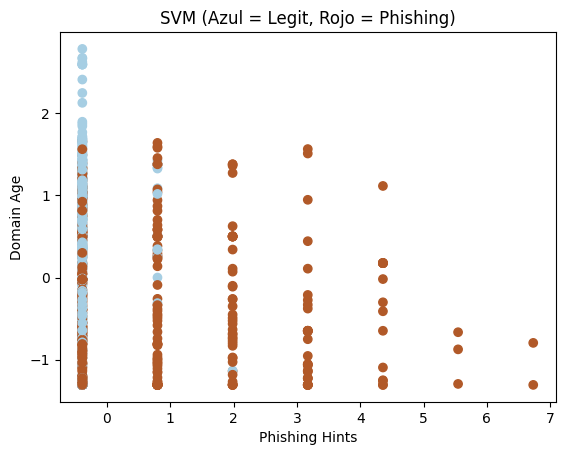

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('SVM (Azul = Legit, Rojo = Phishing)')
plt.show()

> CONSIDERACIONES EXTRAS:

En el presente análisis fue enecesario realizar tunning de las variables C, gamma y kernel, pues estas variables pueden afectar el modelo SVM. Por ello fue necesario buscar los mejores valores presentes por medio de las técnicas de grid search y cross validation. 

Por otra parte, fue necesario cambiar los valores del conjunto de datos a -1 y 1 en vez de 0 y 1 para poder utilizar el modelo de SVM correctamente, pues este solo acepta los valores -1,1

Finalmente, se seleccionaron solo las variables que fueran necesarias para el presente análisis, pues algunas no brindan información relevante y afectan la realización del modelo.  

Posteriormente, se creó el modelo de Support Vector Machines utilizando SKLearn.
A través de GridSearchCV, se logró hacer el GridSearch y Cross Validation al mismo tiempo. 

In [19]:
# Support Vector Machine con sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Cross validation con grid search
from sklearn.model_selection import GridSearchCV

# Crear el modelo
svm = SVC()
# Crear el diccionario de parámetros a probar           https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_grid = {'C': [0.1, 1], 'gamma': [0.1, 0.01], 'kernel': ['linear', 'rbf', 'linear']}

# Inicializar el gridsearch y cross validation
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)

# Usar los datos de validacion (10%) para el GridSearch-CrossValidation
grid.fit(X_val, y_val)

# Imprimir los mejores parámetros
print('Mejores parámetros:',grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

En base a los mejores parámetros previamente calculados, se realiza el modelo correspondiente con SKLearn.

In [20]:
# Hacer modelo con los mejores parámetros
svm = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones
predictions = svm.predict(X_test)

# Calcular accuracy
print('Accuracy:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test, predictions))

Accuracy: 0.8888888888888888

Matriz de confusión:
 [[514  67]
 [ 60 502]]


> Métricas de Desempeño

En el presente análisis fue posible utilizar la métrica de desempeño pues se balancearon los datos, de lo contrario no sería considerada una métrica válida. 

Para medir el desempeño del modelo creado, se utilizó una matríz de confusión y la calificación de exactitud del modelo. Cada uno de estos dos valores son importantes para evaluar el modelo, ya que permite analizar diferentes aspectos de este. 
La calificación de exactitud es un valor único que califica que tanto se parecen los valores calculados por el modelo con los valores esperados. En otras palabras, es el porcentaje de predicciones que el modelo obtuvo correctos. Para el modelo creado se obtuvo una calificación de exactitud del 88%, lo cual indica que el modelo coincide en su mayoría con los datos esperados. 

Ademas de la calificación de exactitud, se utiliza una matríz de confusión para analizar los valores correctos, los falsos positivos, y los falsos negativos. En esta matriz, se observan cuatro valores almacenados en una matríz de dos por dos. En la primera fila, se muestran la cantidad de verdaderos positivos y falsos positivos. En la segunda fila, se muetran la cantidad de falsos positivos y verdaderos negativos. Esta matríz es importante porque resume los resultados de una predicción en un problema de clasificación. Adicionalmente, permite calcular otras métricas de desempeño como la calificación de exactitud. 

Para finalizar, se graficaron los grupos creados con la predicción del modelo de SVM que usaba KLearn.

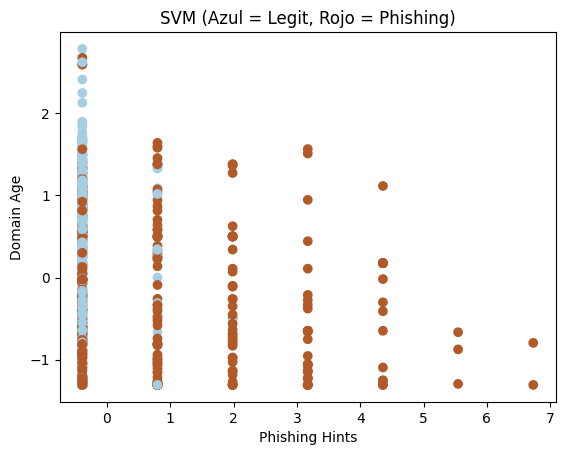

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

# Variables a seleccionar para la gráfica: domain_age y phish_hints

X = X_test[['phish_hints', 'domain_age']]

# Graficar en X page_rank y en Y nb_www; color según status
plt.scatter(X['phish_hints'], X['domain_age'], c=predictions, cmap=plt.cm.Paired)
plt.xlabel('Phishing Hints')
plt.ylabel('Domain Age')
plt.title('SVM (Azul = Legit, Rojo = Phishing)')
plt.show()

> Comparación de Resultados

Al comparar los datos del modelo SVM creado con la librería y los datos del modelo creado sin la librería, se puede observar que el modelo que utilizó una libreria es un poco más exacto. Esto se hace evidente al comparar las calificaciones de exactitud, que son de 0.88 y 0.89 para el modelo que utiliza y no utiliza una librería respectivamente. 

Adicionalmente, al comparar las matrices de confusión, se puede ver tanto el modelo que utiliza librerías como el que no, tienen casi la misma cantidad de falsos positivos y falsos negativos, lo que demuestra la validez y presición del modelo creado. 

Por otro lado, es importante mencionar que el modelo creado con la librería es capaz de hacer el respectivo modelo de manera más rápida. Esto siendo importante en casos cuando se está manejando grandes cantidades de información y se requiere de un algoritmo optimizado.